## Things to be modified in different runs

In [1]:
# modify this
tifFolderDir = "/Users/yiqingmelodywang/Desktop/CMU/Murphy Lab/code/ICCImageAnalysis/TestDataset"
totalNumOfCh = 5
BFCh = 0


In [2]:
# modify this as needed, if plate design changes
import re
"""
The following dictionaries help filter out the right files for the right purpose
"""
conditionRegexDict = {"fixedOnly":re.compile('[A-Z]02'), "fixedPermCtrl":re.compile('[A-Z]03'),
                "noPrimSec1":re.compile('[A-Z]04'), "noPrimSec2": re.compile('[A-Z]05'),
                "prim1Sec1":re.compile('[A-Z]06'), "prim1Sec2": re.compile('[A-Z]07'),
                "prim2Sec1":re.compile('[A-Z]08'), "prim2Sec2": re.compile('[A-Z]09'),
                "doubleAb":re.compile('[A-Z]1[0-1]')}

chRegexDict = {"actin":re.compile('f..d1'), "sec1":re.compile('f..d2'),
              "sec2":re.compile('f..d4'),"Hoechst":re.compile('f..d3')}

# format is {task: [[conditions to include for the test], [names of the channel to look at]]}
taskDict = {"fixation":[["fixedOnly","fixedPermCtrl"], ["actin"]], 
              "permeabilization":[["fixedOnly","fixedPermCtrl"],["Hoechst"]],
             "nonspecificBindingSec1":[["noPrimSec1","prim2Sec1","prim1Sec1"],["sec1"]],
             "nonspecificBindingSec2":[["noPrimSec2","prim1Sec2","prim2Sec2"],["sec2"]],
              "spilloverSec1to2":[["prim1Sec1"],["sec1","sec2"]],
             "spilloverSec2to1":[["prim2Sec2"],["sec2","sec1"]],
             "colocalization":[["doubleAb"],["sec1","sec2"]]}

## General analysis process starts from here

In [3]:
chList = list(range(totalNumOfCh))
chList.remove(BFCh)

### Contrast stretching

In [4]:
"""
Read in images
contrast stretch
put images after contrast stretching into separate dictionaries
"""
from pathlib import Path
from skimage import io as sk
import numpy as np
p = Path(tifFolderDir)
stretchedImgDict = {}
genericName = re.compile('[A-Z]..f..d.')
for ch in chList: # do contrast stretch in one channel at a time
    chTifDir = list(p.glob(f"*d{ch}*.TIF"))
    chImgToNormalize = []
    for d in chTifDir:
        dir = str(d) 
        print(sk.imread(dir))
        chImgToNormalize.append(sk.imread(dir))
    chImgToNormalize = np.array(chImgToNormalize)
    print("chImgToNormalize shape", np.shape(chImgToNormalize))
    chMax = np.percentile(chImgToNormalize, 99.999)
    print("chMax is", chMax)
    chMin = np.min(chImgToNormalize)
    print("chMin is", chMin)
    for i in range(len(chImgToNormalize)):
        pic = chImgToNormalize[i]
        normPic = (pic - chMin)/ (chMax - chMin) * 255.0
        normPic[normPic > 255] = 255.0
        idxSpan = genericName.search(str(chTifDir[i]))
        assert idxSpan != None, "dir name is not conventional"
        name = str(chTifDir[i])[idxSpan.span()[0]:idxSpan.span()[1]]
        print(name)
        stretchedImgDict[name] = normPic
keys = list(stretchedImgDict.keys())
values = np.array(list(stretchedImgDict.values()))
# stretchedImgDict should have the well-field-channel encodings as the keys and the normalized images as values

[[ 434  462  490 ... 1111 1212 1114]
 [ 503  485  542 ... 1239 1309 1083]
 [ 459  475  462 ... 1107 1234 1319]
 ...
 [ 793  821  801 ...  691  699  719]
 [ 847  855  872 ...  651  758  694]
 [ 856  871  836 ...  755  744  734]]
[[151 141 151 ... 160 126 143]
 [153 203 187 ... 163 154 149]
 [140 137 149 ... 160 149 149]
 ...
 [252 243 222 ... 198 210 188]
 [189 223 212 ... 220 188 230]
 [214 192 185 ... 224 265 207]]
[[164 155 179 ... 134 167 152]
 [176 157 171 ... 139 171 148]
 [178 153 169 ... 140 159 150]
 ...
 [183 188 208 ... 224 244 239]
 [194 186 201 ... 192 208 208]
 [178 191 180 ... 226 221 266]]
[[177 141 173 ... 176 173 143]
 [203 183 160 ... 147 133 161]
 [169 148 138 ... 161 153 141]
 ...
 [202 222 179 ... 194 251 192]
 [215 223 229 ... 218 261 218]
 [201 199 207 ... 249 186 208]]
[[158 128 136 ... 165 177 135]
 [160 155 150 ... 161 131 176]
 [153 145 150 ... 138 148 167]
 ...
 [158 211 206 ... 215 210 219]
 [194 168 194 ... 213 212 245]
 [189 185 203 ... 183 173 200]]
[[15

### Check quality of fixation

[[[12]], [[0]]]


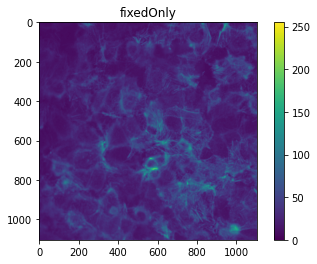

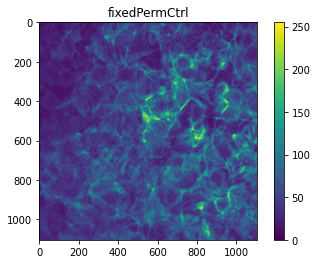

In [5]:
# get relevant images
from matplotlib import pyplot as plt
from getRelevantImg import *
keysIdx = getRelevantImg("fixation", taskDict, conditionRegexDict, chRegexDict, keys)
print(keysIdx)
# manual inspection at the moment; automate later
# take a look at some
# change this
inspectImgNum = 1
for i in range(inspectImgNum):
    for j in range(len(keysIdx)):
        for k in range(len(keysIdx[0])):
            plt.figure()
            plt.imshow(values[keysIdx[j][k][i]])
            plt.title(taskDict["fixation"][0][j])
            plt.clim([0, 255])
            plt.colorbar()


### Check quality of permeabilization
#### cannot be a routine test

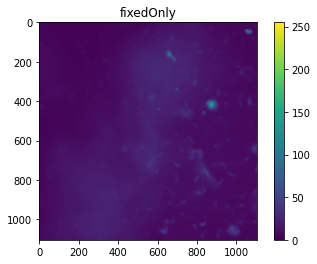

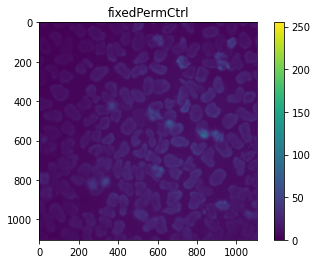

In [6]:
keysIdx = getRelevantImg("permeabilization", taskDict, conditionRegexDict, chRegexDict, keys)
# manual inspection at the moment; automate later
# take a look at some
# change this
inspectImgNum = 1
for i in range(inspectImgNum):
    for j in range(len(keysIdx)):
        for k in range(len(keysIdx[0])):
            plt.figure()
            plt.imshow(values[keysIdx[j][k][i]])
            plt.title(taskDict["permeabilization"][0][j])
            plt.clim([0, 255])
            plt.colorbar()

### Correct for Spillover (Sec1 into Sec2)

In [17]:
from LinReg import *
keysIdx = getRelevantImg("spilloverSec1to2", taskDict, conditionRegexDict, chRegexDict, keys)
coeff, intercept = LinReg(keysIdx, values)

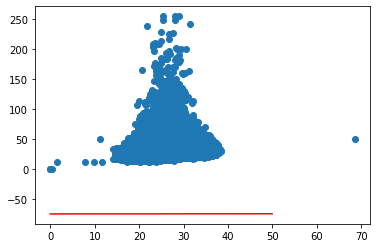

In [16]:
plt.scatter(values[keysIdx[0][0][0]], values[keysIdx[0][1][0]])
x = np.array(list(range(1000)))/20
y = x*coeff + intercept
plt.plot(x, y, "r-")
plt.show()

### Watershed segmentation

### Check Nonspecific binding (average per cell) [decide if the experiment is bad]

In [7]:
#FIXME

### Calculate Mander's Coefficient